## Import 

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

%pip install missingno
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


## Data Load & Check Data

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,previous_class_8,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participation,idea_contest,onedayclass_topic,completed
0,TRAIN_000,9,22,"복수 전공 ( 다중전공, 이중전공 포함 )",경제통상학,자연과학,False,대학생,1,4.0,NaN,NaN,아니요,NaN,내국인,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"자연과학, 사회과학",대학원 진학,4.0,팀,2.0,C. 데이터 사이언티스트,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 태블로 관련 자격증, 구글 애널리스트",A. 금융 / 보험 직무,시니어 (10년차 ~),산업 트렌드 (예시: ChatGPT로 인한 직무 변화),해외 기업 (빅테크),"온, 오프라인 동시",100명 이상의 리스너와 10명 이상의 현직자,다양한 사람들과 만나서 생각을 교류할 수 있기 때문,"구글 딥마인드, 카카오 브레인","M. 전문, 과학 및 기술 서비스업",NaN,NaN,"Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신...",0
1,TRAIN_001,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",자연과학,IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,사회과학,취업,6.0,팀,3.0,"B. 데이터 분석가, C. 데이터 사이언티스트",없음,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사","D. 소프트웨어 개발자, F. PM / 서비스 기획자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,더 많은 사람들이 있으면 제가 예상하지 못한 질문도 할 수 있다고 생각하기 때문입니다.,제일 기획,"J. 정보통신업, O. 공공 행정, 국방 및 사회보장 행정",NaN,NaN,머신러닝 / 딥러닝 응용,0
2,TRAIN_002,9,27,단일 전공,예체능,NaN,False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,인스타그램,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,예체능,대학원 진학,8.0,개인,10.0,"B. 데이터 분석가, C. 데이터 사이언티스트, I. 마케터",ADsP,"SQLD, 빅데이터 분석 기사, 정보처리기사","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, H. 마케터 / 영업관리",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 적으면 서로 부담스러울 수 있을 것 같지만 너무 많으면 너무 피상적인 ...,Lg전자,"C. 제조업, K. 금융 및 보험업, R. 예술, 스포츠 및 여가관련 서비스업",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0
3,TRAIN_003,9,1,"복수 전공 ( 다중전공, 이중전공 포함 )",사회과학,IT(컴퓨터 공학 포함),False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,법학,취업,8.0,팀,2.0,"B. 데이터 분석가, C. 데이터 사이언티스트","SQLD, 정보처리기사","ADsP, 빅데이터 분석 기사",A. 금융 / 보험 직무,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카라쿠배당토),"온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 강의하면 루즈해질 것 같아서,네이버,"J. 정보통신업, K. 금융 및 보험업",NaN,NaN,머신러닝 / 딥러닝 응용,1
4,TRAIN_004,9,16,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),True,대학생,8,NaN,NaN,NaN,아니요,NaN,내국인,지인 추천,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,NaN,"IT (컴퓨터 공학 포함), 인문학",취업,7.0,팀,2.0,B. 데이터 분석가,ADsP,"SQLD, 정보처리기사, 태블로 관련 자격증, 구글 애널리스트","A. 금융 / 보험 직무, B. 기획 / 전략 / 경영 직무, F. PM / 서비스...",주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),"국내 대기업 IT 계열 (금융, 제조 ...)","온, 오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,다양한 사람들에게 기회가 있으면 좋겠습니다.,네이버,"K. 금융 및 보험업, M. 전문, 과학 및 기술 서비스업, R. 예술, 스포츠 및...",NaN,NaN,"머신러닝 / 딥러닝 응용, SQL 응용, 웹 크롤링",0


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               748 non-null    object 
 1   generation                       748 non-null    int64  
 2   school1                          748 non-null    int64  
 3   major type                       726 non-null    object 
 4   major1_1                         728 non-null    object 
 5   major1_2                         309 non-null    object 
 6   major_data                       748 non-null    bool   
 7   job                              748 non-null    object 
 8   class1                           748 non-null    int64  
 9   class2                           169 non-null    float64
 10  class3                           14 non-null     float64
 11  class4                           1 non-null      float64
 12  re_registration       

타겟 변수 분포:
0    0.701872
1    0.298128
Name: completed, dtype: float64


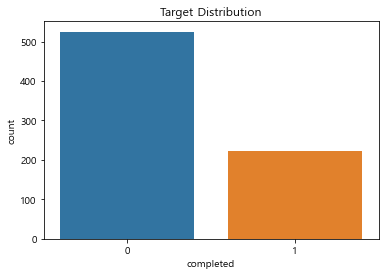

In [59]:
# 타겟 변수 비율 확인
print("타겟 변수 분포:")
print(train['completed'].value_counts(normalize=True))

# 시각화
sns.countplot(x='completed', data=train)
plt.title('Target Distribution')
plt.show()

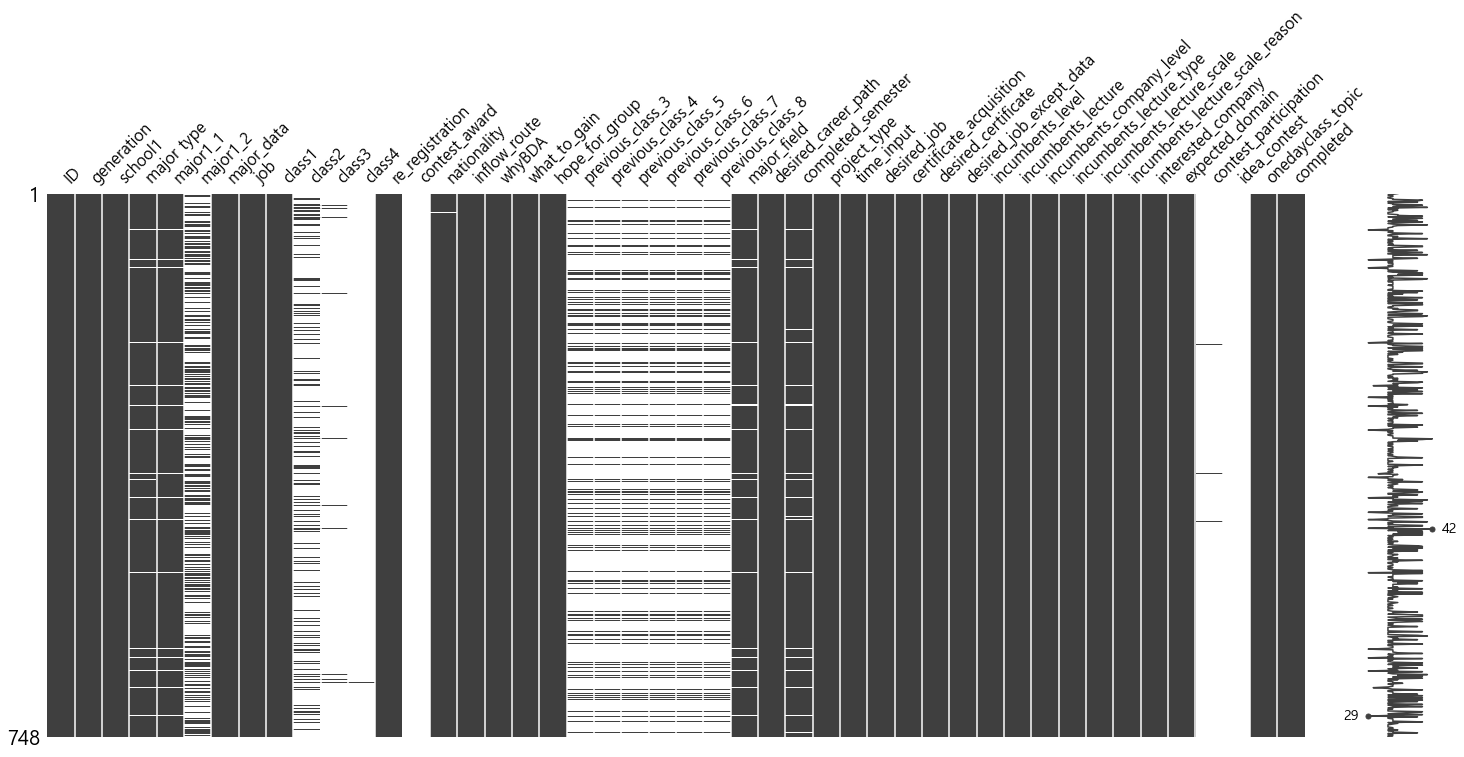

삭제된 컬럼: ['class3', 'class4', 'contest_award', 'previous_class_3', 'previous_class_4', 'previous_class_5', 'previous_class_6', 'previous_class_7', 'previous_class_8', 'contest_participation', 'idea_contest']


In [60]:
msno.matrix(train)
plt.show()

# 삭제된 컬럼들이 무엇인지 확인 (중요한 정보일 수도 있음)
missing_ratio = train.isnull().mean()
print("삭제된 컬럼:", missing_ratio[missing_ratio > 0.8].index.tolist())

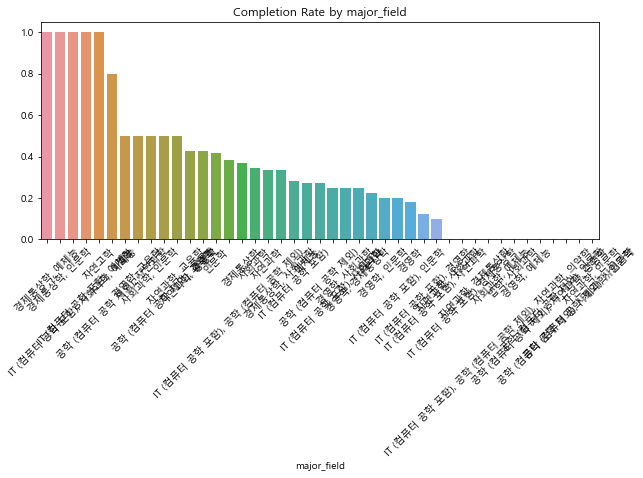

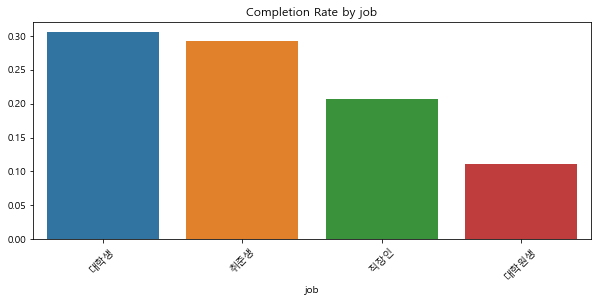

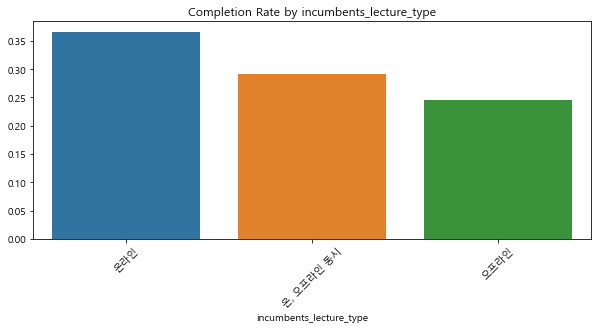

In [61]:
# 주요 범주형 변수별 수료율 시각화 함수
def plot_conversion_rate(df, col):
    temp = df.groupby(col)['completed'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=temp.index, y=temp.values)
    plt.title(f'Completion Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

# 예시: 전공 계열, 현재 직업, 희망 직무별 수료율 확인
for col in ['major_field', 'job', 'incumbents_lecture_type']:
    plot_conversion_rate(train, col)

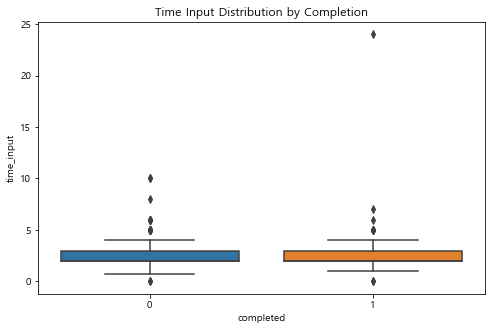

In [74]:
# 시간 투입량에 따른 수료 여부 분포
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='time_input', data=train)
plt.title('Time Input Distribution by Completion')
plt.show()

In [63]:
# 예: 'Python'이라는 단어가 포함되었는지 여부
train['interest_python'] = train['onedayclass_topic'].str.contains('Python').astype(int)
test['interest_python'] = test['onedayclass_topic'].str.contains('Python').astype(int)

# 관심사에 따른 수료율 차이 확인
print(train.groupby('interest_python')['completed'].mean())

interest_python
0    0.279518
1    0.321321
Name: completed, dtype: float64


## Pre-Processing

In [64]:
# --------------------------------------------------------------------------------
# 1. 데이터 로드
# --------------------------------------------------------------------------------
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 타겟 변수 분리
train_y = train['completed']
train_len = len(train)

# ID는 학습에 방해되므로 미리 제거 (나중에 submission용으로 필요하면 test ID만 따로 저장)
train = train.drop(columns=['ID', 'completed'])
test_id = test['ID'] # 제출용 저장
test = test.drop(columns=['ID'])

# 합치기
df_all = pd.concat([train, test], axis=0).reset_index(drop=True)


# --------------------------------------------------------------------------------
# 2. 결측치(NaN) 처리 & 파생 변수 생성
# --------------------------------------------------------------------------------

# 2-1. '없음'을 의미하는 텍스트 컬럼 채우기
fill_none_cols = ['contest_award', 'contest_participation', 'idea_contest', 
                  'certificate_acquisition', 'onedayclass_topic']
for col in fill_none_cols:
    if col in df_all.columns:
        df_all[col] = df_all[col].fillna('None')

# 2-2. previous_class (과거 수강 이력) -> 횟수로 변환 후 원본 삭제
prev_cols = [c for c in df_all.columns if 'previous_class' in c]
df_all['past_enrollment_count'] = df_all[prev_cols].notnull().sum(axis=1)
df_all = df_all.drop(columns=prev_cols) 

# 2-3. 서술형 응답 길이 변환 (NaN은 길이 0으로)
df_all['incumbents_lecture_scale_reason'] = df_all['incumbents_lecture_scale_reason'].fillna('').apply(len)

# 2-4. 전공(major_field) 분석
df_all['major_field'] = df_all['major_field'].fillna('Unknown')
df_all['is_major_IT'] = df_all['major_field'].str.contains('IT|컴퓨터', na=False, case=False).astype(int)
df_all['is_major_Economics'] = df_all['major_field'].str.contains('경제|경영', na=False, case=False).astype(int)

# 2-5. 파이썬 관심도
df_all['onedayclass_topic'] = df_all['onedayclass_topic'].fillna('None')
df_all['interest_python'] = df_all['onedayclass_topic'].str.contains('python|파이썬', na=False, case=False).astype(int)


# --------------------------------------------------------------------------------
# 3. [핵심 수정] 수치형 / 범주형 변수 각각 빈칸 채우기
# --------------------------------------------------------------------------------

# 3-1. class 관련 변수들을 범주형으로 강제 변환
class_cols = [c for c in df_all.columns if c.startswith('class')]
for col in class_cols:
    df_all[col] = df_all[col].fillna(-1).astype(int).astype(str).replace('-1', 'None')

# 3-2. 수치형 변수(Numerical) 결측치 해결 -> 0으로 채움
# (time_input, completed_semester 등이 여기서 처리됨)
num_cols = df_all.select_dtypes(include=['number']).columns
df_all[num_cols] = df_all[num_cols].fillna(0)

# 3-3. 범주형 변수(Categorical) 결측치 해결 -> 'Unknown'으로 채움
cat_cols = df_all.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_all[col] = df_all[col].fillna('Unknown')


# --------------------------------------------------------------------------------
# 4. 인코딩 및 마무리
# --------------------------------------------------------------------------------

# 4-1. 죽은 변수(값이 1개뿐인 컬럼) 제거
constant_cols = [col for col in df_all.columns if df_all[col].nunique() <= 1]
df_all = df_all.drop(columns=constant_cols)
print(f"삭제된 죽은 변수: {constant_cols}")

# 4-2. 라벨 인코딩
# (변수가 삭제되었을 수 있으므로 cat_cols 다시 갱신)
cat_cols = df_all.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_all[col] = le.fit_transform(df_all[col])

# 4-3. 다시 나누기
train = df_all.iloc[:train_len].copy()
test = df_all.iloc[train_len:].copy()
train['completed'] = train_y # 정답 다시 붙이기

print("\n[최종 검증]")
print(f"Train Nan Sum: {train.isnull().sum().sum()}") # 0이 나와야 정상
print(f"Test Nan Sum: {test.isnull().sum().sum()}")   # 0이 나와야 정상
print(f"Train Shape: {train.shape}")

삭제된 죽은 변수: ['contest_award', 'idea_contest']

[최종 검증]
Train Nan Sum: 0
Test Nan Sum: 0
Train Shape: (748, 41)


## EDA

<AxesSubplot:>

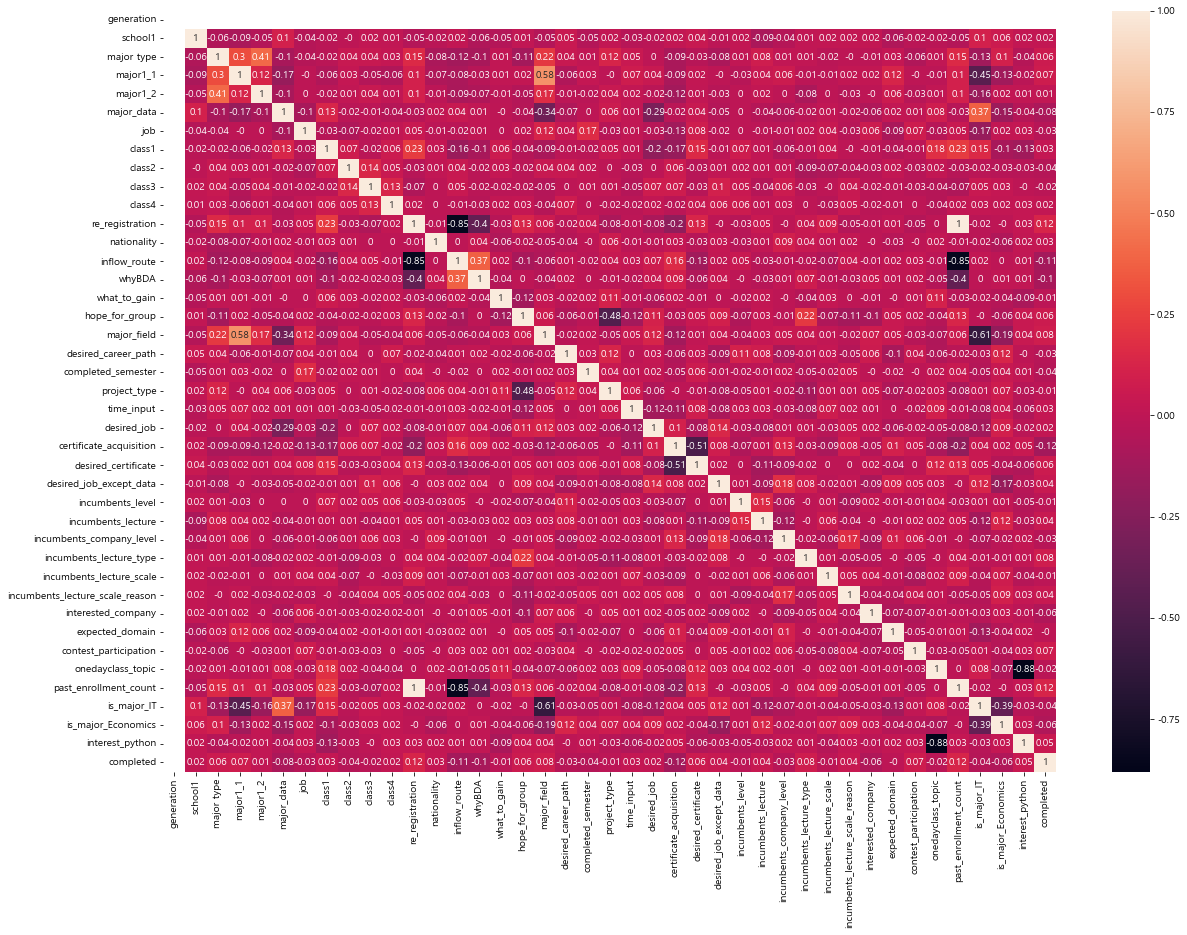

In [65]:
plt.figure(figsize=(20,14))
sns.heatmap(train.corr().round(2), annot = True)

## Feature Selection & Modelling

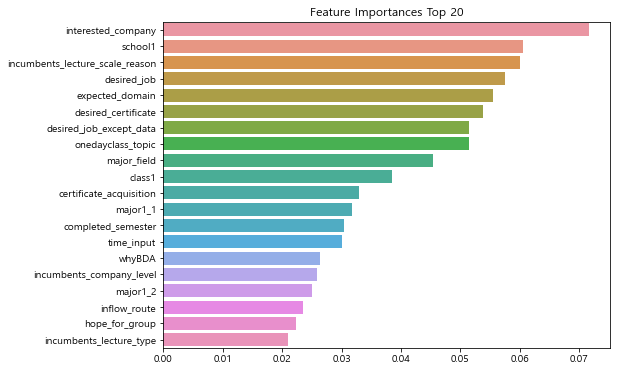

In [71]:
# 1. 학습에 사용할 변수 선택 (ID와 타겟 변수 제거)
# drop해야 할 것: 'ID', 'completed' (타겟), 그리고 텍스트 원본이 남아있다면 제거
features = train.drop(columns=['completed', 'generation']).columns

# X(입력), y(정답) 준비
X = train[features]
y = train['completed']

# 테스트 데이터도 똑같은 컬럼을 가져야 함
test_X = test[features]

# 2. 모델 정의 및 학습
# random_state를 고정해야 결과가 재현됨
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X, y)

# 3. (중요) Feature Importance 시각화
# 모델이 실제로 어떤 변수를 보고 정답을 맞혔는지 확인하는 과정

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## Inference

In [72]:
pred = model.predict(test_X)

## Submission

In [73]:
submission = pd.read_csv('sample_submission.csv')
submission['completed'] = pred
submission.to_csv('submit.csv', index = False)